## Extra COLAB Code

In [0]:
from google.colab import drive
import os
import sys
drive.mount('/content/drive')
dep_path = os.getcwd()+'/drive/My Drive/Colab Notebooks/BT/'
sys.path.insert(0, dep_path)
os.listdir(dep_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['program.ipynb', 'ML', 'Regular Expression.ipynb', 'prom_seqs.npy']

In [0]:
!pip install suffix-trees

In [0]:
import sys
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [0]:
file =  dep_path+"ML/cele"
f= open(file,mode='r',encoding='utf8', newline='\n')

In [0]:
seq = []
for x in f.readlines():
    seq.append(x[:-1])

## <u>Dinuclieotide</u> 

### FREE ENERGY 

In [0]:
free_en=dict()
free_en['AA']=-1.0
free_en['AC']=-1.44
free_en['AG']=-1.28
free_en['AT']=-0.88
free_en['CA']=-1.45
free_en['CC']=-1.84
free_en['CG']=-2.17
free_en['CT']=-1.28
free_en['GA']=-1.30
free_en['GC']=-2.24
free_en['GG']=-1.84
free_en['GT']=-1.44
free_en['TA']=-0.58
free_en['TC']=-1.30
free_en['TG']=-1.45
free_en['TT']=-1.0

### WEDGE

In [0]:
wedge=dict()
wedge['AA']= 7.2
wedge['AC']= 1.1
wedge['AG']= 8.4
wedge['AT']= 2.6
wedge['CA']= 3.5
wedge['CC']= 2.1
wedge['CG']= 6.7
wedge['CT']= 8.4
wedge['GA']= 5.3
wedge['GC']= 5.0
wedge['GG']= 2.1
wedge['GT']= 1.1
wedge['TA']= 0.9
wedge['TC']= 5.3
wedge['TG']= 3.5
wedge['TT']= 7.2

### PROP

In [0]:
prop=dict()
prop['AA']= -17.3
prop['AC']=-6.7
prop['AG']=-14.3
prop['AT']=-16.9
prop['CA']=-8.6
prop['CC']=-12.8
prop['CG']=-11.2
prop['CT']=-14.3
prop['GA']=-15.1
prop['GC']=-11.7
prop['GG']=-12.8
prop['GT']=-6.7
prop['TA']=-11.1
prop['TC']=-15.1
prop['TG']=-8.6
prop['TT']=-17.3

### GC

In [0]:
prop=dict()
prop['AA']=0.0
prop['AC']=0.5
prop['AG']=0.5
prop['AT']=0.0
prop['CA']=0.5
prop['CC']=1.0
prop['CG']=1.0
prop['CT']=0.5
prop['GA']=0.5
prop['GC']=1.0
prop['GG']=1.0
prop['GT']=0.5
prop['TA']=0.0
prop['TC']=0.5
prop['TG']=0.5
prop['TT']=0.0

## <u>Trinucleotide</u>

In [0]:
tri=dict()
tri['AAA']=36
tri['AAC']=6
tri['AAG']=6
tri['AAT']=30
tri['ACA']=6
tri['ACC']=8
tri['ACG']=8
tri['ACT']=11
tri['AGA']=9
tri['AGC']=25
tri['AGG']=8
tri['AGT']=11
tri['ATA']=13
tri['ATC']=7
tri['ATG']=18
tri['ATT']=30
tri['CAA']=9
tri['CAC']=17
tri['CAG']=2
tri['CAT']=18
tri['CCA']=8
tri['CCC']=13
tri['CCG']=2
tri['CCT']=8
tri['CGA']=31
tri['CGC']=25
tri['CGG']=2
tri['CGT']=8
tri['CTA']=18
tri['CTC']=8
tri['CTG']=2
tri['CTT']=6
tri['GAA']=12
tri['GAC']=8
tri['GAG']=8
tri['GAT']=7
tri['GCA']=13
tri['GCC']=45
tri['GCG']=25
tri['GCT']=25
tri['GGA']=5
tri['GGC']=45
tri['GGG']=13
tri['GGT']=8
tri['GTA']=6
tri['GTC']=8
tri['GTG']=17
tri['GTT']=6
tri['TAA']=20
tri['TAC']=6
tri['TAG']=18
tri['TAT']=13
tri['TCA']=8
tri['TCC']=5
tri['TCG']=31
tri['TCT']=9
tri['TGA']=8
tri['TGC']=13
tri['TGG']=8
tri['TGT']=6
tri['TTA']=20
tri['TTC']=12
tri['TTG']=9
tri['TTT']=36

In [0]:
dnase1 = dict()
dnase1['AAT'] =-0.280
dnase1['ATT'] = -0.280
dnase1['AAA'] = -0.274
dnase1['TTT'] = -0.274
dnase1['CCA'] = -0.246
dnase1['TGG'] = -0.246
dnase1['AAC'] = -0.205
dnase1['GTT'] = -0.205
dnase1['CCG'] = -0.136
dnase1['CGG'] = -0.136
dnase1['ATC'] = -0.110
dnase1['GAT'] = -0.110
dnase1['ACT'] = -0.183
dnase1['AGT'] = -0.183
dnase1['AAG'] = -0.081
dnase1['CTT'] = -0.081
dnase1['CGC'] = -0.077
dnase1['GCG'] = -0.077
dnase1['AGG'] = -0.057
dnase1['CCT'] = -0.057
dnase1['GAA'] = -0.037
dnase1['TTC'] = -0.037
dnase1['ACG'] = -0.033
dnase1['CGT'] = -0.033
dnase1['ACC'] = -0.032
dnase1['GGT'] = -0.032
dnase1['GAC'] = -0.013
dnase1['GTC'] = -0.013
dnase1['CCC'] = -0.012
dnase1['GGG'] = -0.012
dnase1['ACA'] = -0.006
dnase1['TGT'] = -0.006
dnase1['CGA'] = -0.003
dnase1['TCG'] = -0.003
dnase1['GGA'] = 0.013
dnase1['TCC'] = 0.013
dnase1['CAA'] = 0.015
dnase1['TTG'] = 0.015
dnase1['AGC'] = 0.017
dnase1['GCT'] = 0.017
dnase1['GTA'] = 0.025
dnase1['TAC'] = 0.025
dnase1['AGA'] = 0.027
dnase1['TCT'] = 0.027
dnase1['CTC'] = 0.031
dnase1['GAG'] = 0.031
dnase1['CAC'] = 0.040
dnase1['GTG'] = 0.040
dnase1['TAA'] = 0.068
dnase1['TTA'] = 0.068
dnase1['GCA'] = 0.076
dnase1['TGC'] = 0.076
dnase1['CTA'] = 0.090
dnase1['TAG'] = 0.090
dnase1['GCC'] = 0.107
dnase1['GGC'] = 0.107
dnase1['ATG'] = 0.134
dnase1['CAT'] = 0.134
dnase1['CAG'] = 0.175
dnase1['CTG'] = 0.175
dnase1['ATA'] = 0.182
dnase1['TAT'] = 0.182
dnase1['TCA'] = 0.194
dnase1['TGA'] = 0.194


## Tetranucliotide

In [0]:
tetra = dict()
tetra['AAAA'] = 4.5 
tetra['AAAC'] = 4.8 
tetra['AAAG'] = 5.3 
tetra['AAAT'] = 4.1 
tetra['AACA'] = 5.7
tetra['AACC'] = 6.5
tetra['AACG'] = 5.6
tetra['AACT'] = 5.1
tetra['AAGA'] = 5.1 
tetra['AAGC'] = 7.5 
tetra['AAGG'] = 6.7 
tetra['AAGT'] = 4.5 
tetra['AATA'] = 4.1 
tetra['AATC'] = 4.4 
tetra['AATG'] = 5.8 
tetra['AATT'] = 4.4
tetra['ACAA'] = 6.6
tetra['ACAC'] = 6.9
tetra['ACAG'] = 6.9
tetra['ACAT'] = 5.8
tetra['ACCA'] = 7.1
tetra['ACCC'] = 6.8
tetra['ACCG'] = 7.2
tetra['ACCT'] = 6.4
tetra['ACGA'] = 7.5 
tetra['ACGC'] = 6.7 
tetra['ACGG'] = 7.5 
tetra['ACGT'] = 7.0 
tetra['ACTA'] = 6.6
tetra['ACTC'] = 6.4
tetra['ACTG'] = 6.5
tetra['ACTT'] = 4.5
tetra['AGAA'] = 5.2 
tetra['AGAC'] = 6.1 
tetra['AGAG'] = 6.8 
tetra['AGAT'] = 5.1 
tetra['AGCA'] = 7.9 
tetra['AGCC'] = 7.2 
tetra['AGCG'] = 7.9 
tetra['AGCT'] = 7.5 
tetra['AGGA'] = 6.5 
tetra['AGGC'] = 7.9 
tetra['AGGG'] = 7.7 
tetra['AGGT'] = 6.4 
tetra['AGTA'] = 7.3 
tetra['AGTC'] = 6.5 
tetra['AGTG'] = 7.0 
tetra['AGTT'] = 5.1 
tetra['ATAA'] = 4.9
tetra['ATAC'] = 6.5 
tetra['ATAG'] = 5.4 
tetra['ATAT'] = 7.7 
tetra['ATCA'] = 6.6
tetra['ATCC'] = 5.8
tetra['ATCG'] = 6.8
tetra['ATCT'] = 5.1
tetra['ATGA'] = 6.8 
tetra['ATGC'] = 6.5 
tetra['ATGG'] = 7.5 
tetra['ATGT'] = 5.8 
tetra['ATTA'] = 4.8
tetra['ATTC'] = 4.6
tetra['ATTG'] = 5.9
tetra['ATTT'] = 4.1
tetra['CAAA'] = 6.2 
tetra['CAAC'] = 6.9 
tetra['CAAG'] = 6.5 
tetra['CAAT'] = 5.9
tetra['CACA'] = 7.0
tetra['CACC'] = 7.0
tetra['CACG'] = 6.3
tetra['CACT'] = 7.0
tetra['CAGA'] = 6.2 
tetra['CAGC'] = 7.6 
tetra['CAGG'] = 7.2 
tetra['CAGT'] = 6.5 
tetra['CATA'] = 6.0 
tetra['CATC'] = 6.1
tetra['CATG'] = 6.0
tetra['CATT'] = 5.8
tetra['CCAA'] = 7.7
tetra['CCAC'] = 7.5
tetra['CCAG'] = 6.7
tetra['CCAT'] = 7.5
tetra['CCCA'] = 7.6
tetra['CCCC'] = 9.0
tetra['CCCG'] = 8.1
tetra['CCCT'] = 7.7
tetra['CCGA'] = 7.6 
tetra['CCGC'] = 7.8
tetra['CCGG'] = 8.5
tetra['CCGT'] = 7.5
tetra['CCTA'] = 7.1
tetra['CCTC'] = 6.9
tetra['CCTG'] = 7.2
tetra['CCTT'] = 6.7
tetra['CGAA'] = 6.9 
tetra['CGAC'] = 8.0 
tetra['CGAG'] = 7.6 
tetra['CGAT'] = 6.8 
tetra['CGCA'] = 7.8 
tetra['CGCC'] = 7.7
tetra['CGCG'] = 6.7
tetra['CGCT'] = 7.9
tetra['CGGA'] = 8.2 
tetra['CGGC'] = 7.7
tetra['CGGG'] = 8.1 
tetra['CGGT'] = 7.2 
tetra['CGTA'] = 8.9 
tetra['CGTC'] = 7.5 
tetra['CGTG'] = 6.3 
tetra['CGTT'] = 5.6 
tetra['CTAA'] = 6.2 
tetra['CTAC'] = 7.3
tetra['CTAG'] = 6.5 
tetra['CTAT'] = 5.4
tetra['CTCA'] = 5.7
tetra['CTCC'] = 7.3
tetra['CTCG'] = 7.6
tetra['CTCT'] = 6.8
tetra['CTGA'] = 7.5 
tetra['CTGC'] = 6.7 
tetra['CTGG'] = 6.7 
tetra['CTGT'] = 6.9 
tetra['CTTA'] = 6.2
tetra['CTTC'] = 6.4
tetra['CTTG'] = 6.5
tetra['CTTT'] = 5.3
tetra['GAAA'] = 4.8 
tetra['GAAC'] = 5.5 
tetra['GAAG'] = 6.4 
tetra['GAAT'] = 4.6 
tetra['GACA'] = 6.6
tetra['GACC'] = 6.8
tetra['GACG'] = 7.5
tetra['GACT'] = 6.5
tetra['GAGA'] = 6.2 
tetra['GAGC'] = 7.7 
tetra['GAGG'] = 6.9 
tetra['GAGT'] = 6.4 
tetra['GATA'] = 7.2 
tetra['GATC'] = 6.1 
tetra['GATG'] = 6.1 
tetra['GATT'] = 4.4
tetra['GCAA'] = 7.6
tetra['GCAC'] = 7.4
tetra['GCAG'] = 6.7
tetra['GCAT'] = 6.5
tetra['GCCA'] = 7.2
tetra['GCCC'] = 7.6
tetra['GCCG'] = 7.7
tetra['GCCT'] = 7.9
tetra['GCGA'] = 7.2 
tetra['GCGC'] = 8.3 
tetra['GCGG'] = 7.8 
tetra['GCGT'] = 6.7
tetra['GCTA'] = 6.8
tetra['GCTC'] = 7.7
tetra['GCTG'] = 7.6
tetra['GCTT'] = 7.5
tetra['GGAA'] = 6.8 
tetra['GGAC'] = 7.3 
tetra['GGAG'] = 7.3 
tetra['GGAT'] = 5.8 
tetra['GGCA'] = 7.1
tetra['GGCC'] = 7.8 
tetra['GGCG'] = 7.7 
tetra['GGCT'] = 7.2
tetra['GGGA'] = 7.7 
tetra['GGGC'] = 7.6 
tetra['GGGG'] = 9.0 
tetra['GGGT'] = 6.8 
tetra['GGTA'] = 6.7 
tetra['GGTC'] = 6.8 
tetra['GGTG'] = 7.0 
tetra['GGTT'] = 6.5 
tetra['GTAA'] = 7.2 
tetra['GTAC'] = 6.2
tetra['GTAG'] = 7.3 
tetra['GTAT'] = 6.5
tetra['GTCA'] = 7.0
tetra['GTCC'] = 7.3
tetra['GTCG'] = 8.0
tetra['GTCT'] = 6.1
tetra['GTGA'] = 6.1 
tetra['GTGC'] = 7.4 
tetra['GTGG'] = 7.5 
tetra['GTGT'] = 6.9 
tetra['GTTA'] = 6.5
tetra['GTTC'] = 5.5
tetra['GTTG'] = 6.9
tetra['GTTT'] = 4.8
tetra['TAAA'] = 5.8 
tetra['TAAC'] = 6.5 
tetra['TAAG'] = 6.2 
tetra['TAAT'] = 4.8 
tetra['TACA'] = 7.1
tetra['TACC'] = 6.7
tetra['TACG'] = 8.9
tetra['TACT'] = 7.3
tetra['TAGA'] = 5.9 
tetra['TAGC'] = 6.8 
tetra['TAGG'] = 7.1 
tetra['TAGT'] = 6.6 
tetra['TATA'] = 5.6 
tetra['TATC'] = 7.2
tetra['TATG'] = 6.0
tetra['TATT'] = 4.1
tetra['TCAA'] = 6.2
tetra['TCAC'] = 6.1
tetra['TCAG'] = 7.5
tetra['TCAT'] = 6.8
tetra['TCCA'] = 7.2
tetra['TCCC'] = 7.7
tetra['TCCG'] = 8.2
tetra['TCCT'] = 6.5
tetra['TCGA'] = 8.4
tetra['TCGC'] = 7.2
tetra['TCGG'] = 7.6
tetra['TCGT'] = 7.5
tetra['TCTA'] = 5.9
tetra['TCTC'] = 6.2
tetra['TCTG'] = 6.2
tetra['TCTT'] = 5.1
tetra['TGAA'] = 6.2 
tetra['TGAC'] = 7.0 
tetra['TGAG'] = 5.7 
tetra['TGAT'] = 6.6 
tetra['TGCA'] = 7.5
tetra['TGCC'] = 7.1
tetra['TGCG'] = 7.8
tetra['TGCT'] = 7.9
tetra['TGGA'] = 7.2 
tetra['TGGC'] = 7.2 
tetra['TGGG'] = 7.6 
tetra['TGGT'] = 7.1 
tetra['TGTA'] = 7.1 
tetra['TGTC'] = 6.6 
tetra['TGTG'] = 7.0 
tetra['TGTT'] = 5.7 
tetra['TTAA'] = 6.4
tetra['TTAC'] = 7.2
tetra['TTAG'] = 6.2
tetra['TTAT'] = 4.9
tetra['TTCA'] = 6.2
tetra['TTCC'] = 6.8
tetra['TTCG'] = 6.9
tetra['TTCT'] = 5.2
tetra['TTGA'] = 6.2 
tetra['TTGC'] = 7.6 
tetra['TTGG'] = 7.7 
tetra['TTGT'] = 6.6 
tetra['TTTA'] = 5.8
tetra['TTTC'] = 4.8
tetra['TTTG'] = 6.2
tetra['TTTT'] = 4.5

In [0]:
# seq to number conversion
def get_seq(seq,param):
    seq_num = []
    for i in range(len(seq)):
        temp = []
        for j in range(len(seq[i])-len(list(param.keys())[0])+1):
            temp.append(param[ seq[i][j:j+len(list(param.keys())[0])] ])
        seq_num.append(temp)
    return np.array(seq_num)

In [0]:
#get plot
def avg_seq(seq_num,super_window=15):
    #seq_num = np.array(seq_num)
    avg_sw = []
    for i in range(seq_num.shape[0]):
        temp = []
        if i%10000 ==0 or i==seq_num.shape[0]-1:
            print("seq: {}".format(i))
        for j in range(seq_num.shape[1]-super_window+1):
            temp.append(seq_num[i,j:j+super_window].mean())
        avg_sw.append(temp)
    avg_sw = np.array(avg_sw)
    print("The shape of avg window: {}".format(avg_sw.shape))
    return avg_sw

In [0]:
di_seq = get_seq(seq,free_en)
di_avg = avg_seq(di_seq)

ti_seq = get_seq(seq,tri)
ti_avg = avg_seq(ti_seq)

te_seq = get_seq(seq,tetra)
te_avg = avg_seq(te_seq)

seq: 0
seq: 10000
seq: 20000
seq: 30000
seq: 32480
The shape of avg window: (32481, 986)
seq: 0
seq: 10000
seq: 20000
seq: 30000
seq: 32480
The shape of avg window: (32481, 985)
seq: 0
seq: 10000
seq: 20000
seq: 30000
seq: 32480
The shape of avg window: (32481, 984)


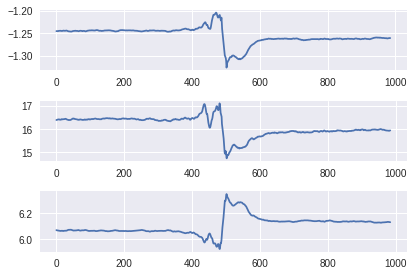

In [0]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.subplot(311)
plt.plot(np.mean(di_avg,axis=0))
plt.subplot(312)
plt.plot(np.mean(ti_avg,axis=0))
plt.subplot(313)
plt.plot(np.mean(te_avg,axis=0))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,
                    wspace=0.35)
plt.show()

In [0]:
print(di_avg.shape,ti_avg.shape,te_avg.shape)

(32481, 986) (32481, 985) (32481, 984)


In [0]:
def identify_peaks(di,ti,te,threshold):
    ln = 100
    gap = 50
    count_free = 0
    count_tetra = 0
    promoter = []
    for i in range(di.shape[0]):
        for j in range(di.shape[1]-(ln*2+gap)+1):
            #print("free energy spike  : {}".format(di[i,j:j+ln].sum()-di[i,j+ln+gap:j+ln+gap+ln].sum()))
            #print("tri : {}".format(ti[i,j:j+ln].sum()-ti[i,j+ln+gap:j+ln+gap+ln].sum()))
            #print("tetra : {}".format(te[i,j:j+ln].sum()-te[i,j+ln+gap:j+ln+gap+ln].sum()))
            if (di[i,j:j+ln].sum()-di[i,j+ln+gap:j+ln+gap+ln].sum()) >=threshold[0] and (ti[i,j:j+ln].sum()-ti[i,j+ln+gap:j+ln+gap+ln].sum()) >=threshold[1] and (te[i,j:j+ln].sum()-te[i,j+ln+gap:j+ln+gap+ln].sum()) >=threshold[2]:
                print("promoter exist at ({},{})".format(i,j))
                promoter.append([i,j])
            elif (di[i,j:j+ln].sum()-di[i,j+ln+gap:j+ln+gap+ln].sum()) >=threshold[0]:
                count_free+=1
                #print("Free energy exits at ({},{})".format(i,j))
            elif (ti[i,j:j+ln].sum()-ti[i,j+ln+gap:j+ln+gap+ln].sum()) >=threshold[2]:
                count_tetra+=1
                #print("tetra signal exits at ({},{})".format(i,j))
    print("number of Free energy positions: {:} and Tetra : {}".format(count_free,count_tetra))
    return promoter

In [0]:
x =identify_peaks(np.array(di_seq),np.array(ti_seq),np.array(te_seq),[0.05,0.5,0.4])

In [0]:
x = np.array(x)

In [0]:
prom = defaultdict(list)
for i in range(x.shape[0]):
  prom[x[i,0]].append(x[i,1])

In [0]:
np.save(dep_path+"prom_seqs.npy",prom)

In [0]:
prom.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 63, 65, 66, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 99, 101, 102, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 168, 169, 170, 171, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251

In [0]:
di_seq[0]

array([[-0.88, -1.  , -1.  , ..., -1.  , -1.  , -1.44],
       [-1.28, -2.24, -1.45, ..., -1.  , -1.3 , -1.45],
       [-1.  , -1.  , -1.3 , ..., -1.3 , -1.  , -1.44],
       ...,
       [-1.  , -1.45, -1.3 , ..., -1.84, -1.3 , -1.28],
       [-1.  , -1.28, -1.84, ..., -1.  , -1.  , -1.44],
       [-2.24, -1.45, -0.88, ..., -1.3 , -1.45, -1.  ]])

In [0]:
fig1 = plt.gcf()
plt.subplot(311)
plt.plot(di_seq[11],c)
plt.subplot(312)
plt.plot(np.mean(ti_avg,axis=0))
plt.subplot(313)
plt.plot(np.mean(te_avg,axis=0))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,
                    wspace=0.35)
plt.show()

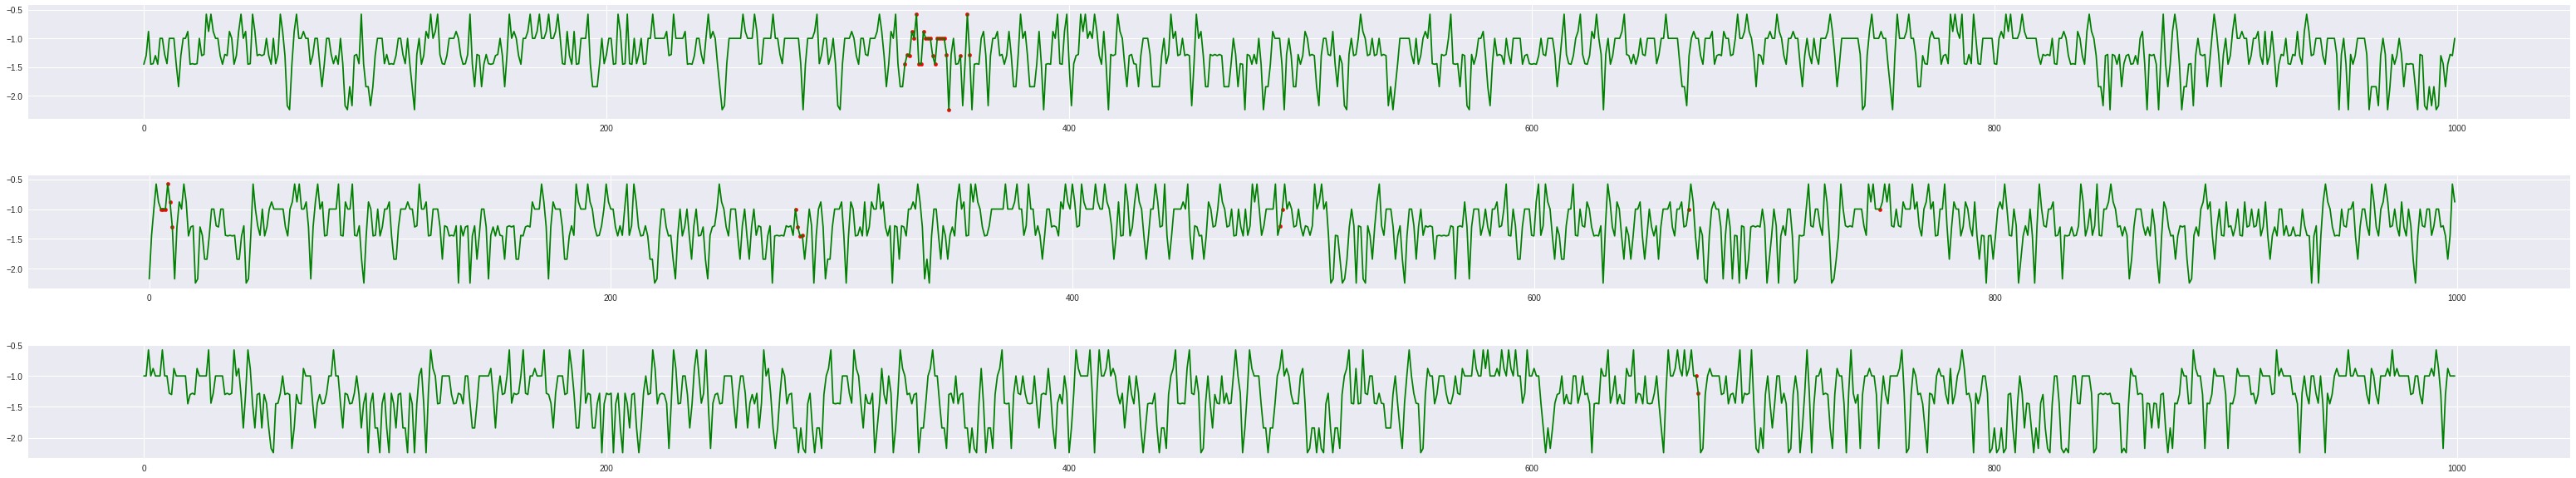

In [0]:
fig1 = plt.gcf()
plt.subplot(311)
n1 = 15
plt.plot(di_seq[n1],c='g')
plt.scatter(prom[n1],np.array(di_seq[n1])[prom[n1]],s=20,c='r')
plt.subplot(312)
n1 = 26
plt.plot(di_seq[n1],c='g')
plt.scatter(prom[n1],np.array(di_seq[n1])[prom[n1]],s=20,c='r')
plt.subplot(313)
n1 = 82
plt.plot(di_seq[n1],c='g')
plt.scatter(prom[n1],np.array(di_seq[n1])[prom[n1]],s=20,c='r')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,
                    wspace=0.35)
fig1.set_size_inches(50,3*3)
plt.show()

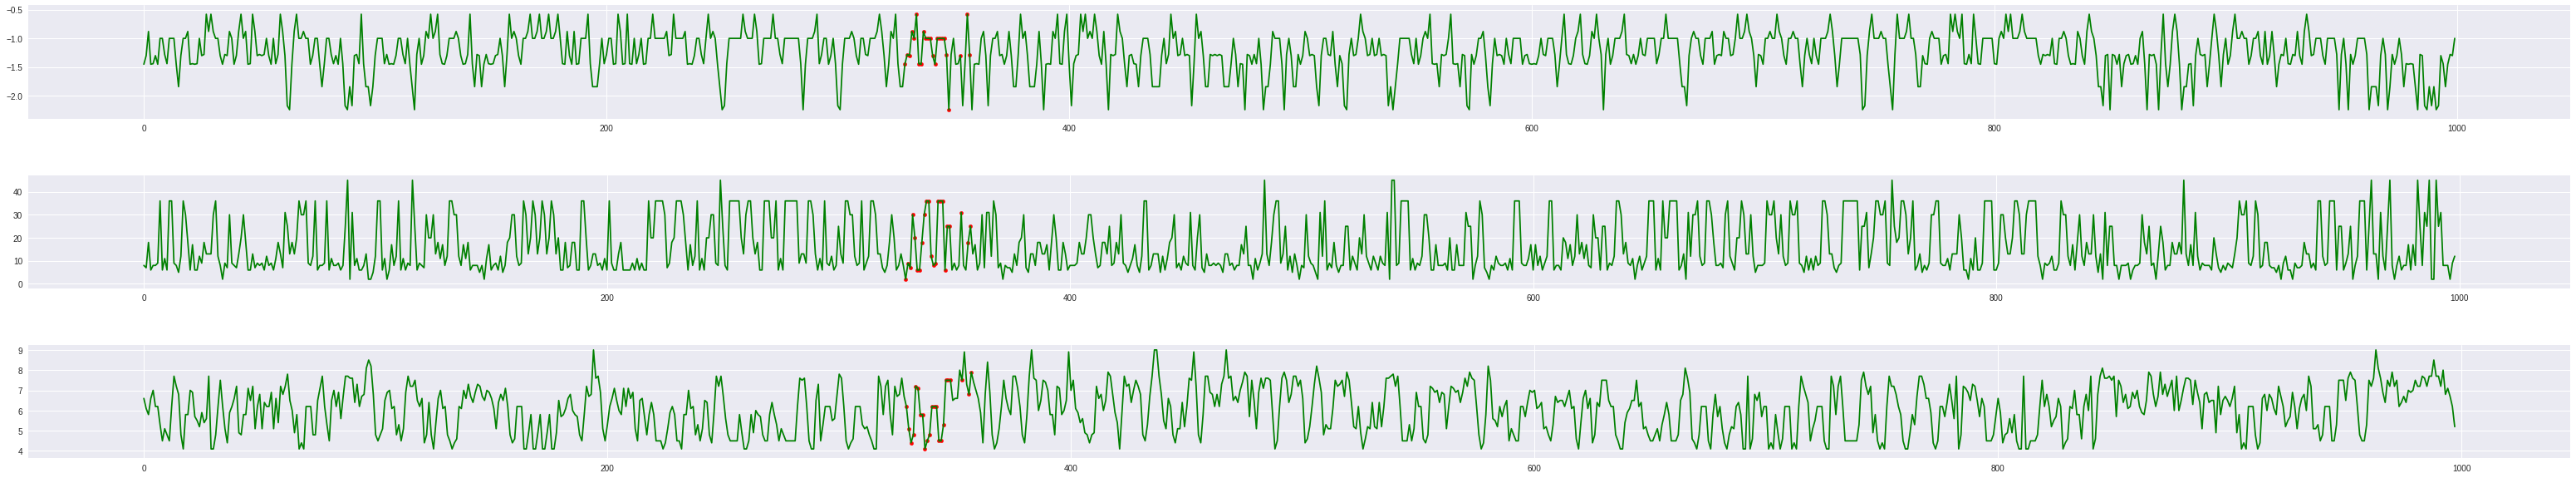

In [0]:
fig1 = plt.gcf()
plt.subplot(311)
n1 = 15
plt.plot(di_seq[n1],c='g')
plt.scatter(prom[n1],np.array(di_seq[n1])[prom[n1]],s=20,c='r')
plt.subplot(312)
#n1 = 26
plt.plot(ti_seq[n1],c='g')
plt.scatter(prom[n1],np.array(ti_seq[n1])[prom[n1]],s=20,c='r')
plt.subplot(313)
#n1 = 82
plt.plot(te_seq[n1],c='g')
plt.scatter(prom[n1],np.array(te_seq[n1])[prom[n1]],s=20,c='r')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.50,
                    wspace=0.35)
fig1.set_size_inches(50,3*3)
plt.show()

In [0]:
from suffix_trees import STree
import re